In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA

# Data

In [2]:
df_customer = pd.read_csv('twm_customer.csv', sep=';')
df_customer.head(5)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [3]:
df_customer.groupby('gender').mean()['income']

gender
F     19833.858852
M     26405.693009
Name: income, dtype: float64

In [3]:
print(df_customer.shape)
print(df_customer.isnull().sum())
print('# of unique customer IDs: ', df_customer['cust_id'].nunique())

(747, 15)
cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64
# of unique customer IDs:  747


In [4]:
df_accounts = pd.read_csv('twm_accounts.csv', sep=';')
df_accounts.head(5)

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [5]:
print(df_accounts.shape)
print(df_accounts.isnull().sum())
print('# of unique customer IDs: ', df_accounts['cust_id'].nunique())
print('# of unique ACCOUNT numbers: ', df_accounts['acct_nbr'].nunique())
# Customers can have multiple accounts.

(1409, 8)
acct_nbr               0
cust_id                0
acct_type              0
account_active         0
acct_start_date        0
acct_end_date       1266
starting_balance       0
ending_balance         0
dtype: int64
# of unique customer IDs:  665
# of unique ACCOUNT numbers:  1409


In [6]:
df_checking_acct = pd.read_csv('twm_checking_acct.csv', sep=';')
df_checking_acct.head(5)

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18


In [7]:
print(df_checking_acct.shape)
print(df_checking_acct.isnull().sum())
print('# of unique customer IDs: ', df_checking_acct['cust_id'].nunique())

(520, 9)
cust_id               0
acct_nbr              0
minimum_balance       0
per_check_fee         0
account_active        0
acct_start_date       0
acct_end_date       468
starting_balance      0
ending_balance        0
dtype: int64
# of unique customer IDs:  520


In [8]:
df_credit_acct = pd.read_csv('twm_credit_acct.csv', sep=';')
df_credit_acct.head(5)

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [9]:
print(df_credit_acct.shape)
print(df_credit_acct.isnull().sum())
print('# of unique customer IDs: ', df_credit_acct['cust_id'].nunique())

(468, 9)
cust_id               0
acct_nbr              0
credit_limit          0
credit_rating         0
account_active        0
acct_start_date       0
acct_end_date       423
starting_balance      0
ending_balance        0
dtype: int64
# of unique customer IDs:  468


In [10]:
df_savings_acct = pd.read_csv('twm_savings_acct.csv', sep=';')
df_savings_acct.head(5)

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [11]:
print(df_savings_acct.shape)
print(df_savings_acct.isnull().sum())
print('# of unique customer IDs: ', df_savings_acct['cust_id'].nunique())

(421, 9)
cust_id               0
acct_nbr              0
minimum_balance       0
acct_type             0
account_active        0
acct_start_date       0
acct_end_date       375
starting_balance      0
ending_balance        0
dtype: int64
# of unique customer IDs:  421


In [12]:
df_transactions = pd.read_csv('twm_transactions.csv', sep=';')
df_transactions.head(5)

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [13]:
print(df_transactions.shape)
print(df_transactions.isnull().sum())
print('# of ACCOUNT numbers: ', df_transactions['acct_nbr'].nunique())

(77580, 10)
tran_id          0
acct_nbr         0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64
# of ACCOUNT numbers:  1398


In [14]:
df_checking_tran = pd.read_csv('twm_checking_tran.csv', sep=';')
df_checking_tran.head(5)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD


In [15]:
print(df_checking_tran.shape)
print(df_checking_tran.isnull().sum())
print('# of unique customer IDs: ', df_checking_tran['cust_id'].nunique())

(46204, 10)
cust_id          0
tran_id          0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64
# of unique customer IDs:  520


In [16]:
df_credit_tran = pd.read_csv('twm_credit_tran.csv', sep=';')
df_credit_tran.head(5)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG


In [17]:
print(df_credit_tran.shape)
print(df_credit_tran.isnull().sum())
print('# of unique customer IDs: ', df_credit_tran['cust_id'].nunique())

(20167, 10)
cust_id          0
tran_id          0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64
# of unique customer IDs:  457


In [18]:
df_savings_tran = pd.read_csv('twm_savings_tran.csv', sep=';')
df_savings_tran.head(5)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [19]:
print(df_savings_tran.shape)
print(df_savings_tran.isnull().sum())
print('# of unique customer IDs: ', df_savings_tran['cust_id'].nunique())

(11189, 10)
cust_id          0
tran_id          0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64
# of unique customer IDs:  420


# Analysis

Customer segmentation based on demographics:

In [20]:
df_customer2 = df_customer.copy()
df_customer2['gender_num'] = df_customer2.apply(lambda row: 0 if row['gender']=='M ' else 1, axis=1)
df_customer2.head(5)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,gender_num
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,0
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,1
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,1
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,1


In [21]:
def plot_distortion(dataframe_name, max_clusters = 10):
    distortions = []
    
    scaler = MinMaxScaler()
    df_seg_scaled = pd.DataFrame(scaler.fit_transform(dataframe_name.astype(float)))
    
    X = df_seg_scaled.to_numpy()
    
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Distortion Plot')
    plt.show() 

In [22]:
def plot_clusters(dataframe_name, cols, num_clusters, plt_cluster_centers = False):
    # cols = list of two column numbers
    
    scaler = StandardScaler()
    df_customer_scaled = pd.DataFrame(scaler.fit_transform(dataframe_name.iloc[:,cols].astype(float)))
    X = df_customer_scaled.to_numpy()
    
    col1_title = dataframe_name.columns[cols[0]]
    col2_title = dataframe_name.columns[cols[1]]
    
    km = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
    y_res = km.fit_predict(X)
    
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        
        plt.scatter(x, y, s=50, marker='s', label = f'cluster {cluster}')
    
    if plt_cluster_centers:
        plt.scatter(X_centroids, Y_centroids, marker = '*', c = 'red', s = 250, label = 'centroids')
    
    plt.legend()
    plt.grid()
    plt.title(f'KMeans Clustering of {col1_title} and {col2_title}')
    
    #plt.rcParams["figure.figsize"] = (6,4)
    
    return

Customer segmentation based on their banking behavior:

In [23]:
df_cust_accounts = pd.merge(df_customer,df_accounts,on='cust_id')[['cust_id','income','age','gender','nbr_children','marital_status',
                                                                   'acct_nbr','acct_type','acct_end_date',
                                                                   'ending_balance']]
df_cust_accounts.nunique()

cust_id            665
income             581
age                 76
gender               2
nbr_children         6
marital_status       4
acct_nbr          1409
acct_type            3
acct_end_date      120
ending_balance    1213
dtype: int64

In [24]:
df_cust_accounts['acct_type'].value_counts()
#CC = credit
#CK = checking
#SV = savings
df_cust_accounts['credit_balance'] = df_cust_accounts['ending_balance'][df_cust_accounts['acct_type']=='CC  ']
df_cust_accounts['checking_balance'] = df_cust_accounts['ending_balance'][df_cust_accounts['acct_type']=='CK  ']
df_cust_accounts['savings_balance'] = df_cust_accounts['ending_balance'][df_cust_accounts['acct_type']=='SV  ']

In [25]:
#df_cust_accounts['ending_balance'][df_cust_accounts['acct_type']=='CK  ']
df_cust_info = df_cust_accounts.loc[:,~df_cust_accounts.columns.isin(['acct_nbr','ending_balance','acct_end_date','acct_type'])]
df_cust_info = df_cust_info.groupby(['cust_id','income','age','gender','nbr_children','marital_status']).sum().reset_index()
df_cust_info['total_balance'] = df_cust_info['checking_balance']+df_cust_info['savings_balance']-df_cust_info['credit_balance']
df_cust_info[df_cust_info['cust_id']==1362480]
#df_cust_info.head()

,cust_id,income,age,gender,nbr_children,marital_status,credit_balance,checking_balance,savings_balance,total_balance
0,1362480,50890,33,M,2,2,20.0,86.86,1187.97,1254.83


In [26]:
df_n = df_cust_accounts[['cust_id','acct_type','acct_nbr']].groupby(['cust_id','acct_type']).count()
df_n[df_n['acct_nbr']>1]

,,acct_nbr
cust_id,acct_type,


In [27]:
df_accounts[df_accounts['cust_id'] == 1362480]

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
1012,13624802,1362480,CK,Y,23.12.1992,NaN,331.85,86.86
1217,4561143213624800,1362480,CC,N,23.12.1992,15.12.1995,1607.40,20.00
1399,13624803,1362480,SV,Y,23.12.1992,NaN,707.09,1187.97


In [28]:
df_sv_counts = df_savings_tran[['cust_id','tran_id']].groupby('cust_id').count().reset_index()
df_cc_counts = df_credit_tran[['cust_id','tran_id']].groupby('cust_id').count().reset_index()
df_ck_counts = df_checking_tran[['cust_id','tran_id']].groupby('cust_id').count().reset_index()

In [29]:
df_cust_info

,cust_id,income,age,gender,nbr_children,marital_status,credit_balance,checking_balance,savings_balance,total_balance
0,1362480,50890,33,M,2,2,20.00,86.86,1187.97,1254.83
1,1362484,10053,42,F,0,1,369.72,95.32,2122.17,1847.77
2,1362485,22690,25,F,0,1,1100.00,45.49,0.00,-1054.51
3,1362486,10701,76,F,0,3,0.00,3312.27,116.24,3428.51
4,1362487,6605,71,M,0,2,1548.23,1401.21,12.89,-134.13
...,...,...,...,...,...,...,...,...,...,...
660,1363490,0,15,F,0,1,0.00,0.00,2301.53,2301.53
661,1363491,0,14,M,0,1,0.00,0.00,17.82,17.82
662,1363492,142274,54,M,0,3,6869.00,106.14,1116.10,-5646.76
663,1363493,30068,69,M,0,2,0.00,2053.90,553.61,2607.51


### Transactions analysis

In [30]:
df_transactions2 = df_transactions.copy()

In [31]:
df_transactions2.head(3)

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD


In [32]:
df_count_transacations = df_transactions2.groupby('acct_nbr').count()['tran_amt'].reset_index()
df_count_transacations = df_count_transacations.rename(columns={'tran_amt':'count_tran_amt'})
df_count_transacations;

In [33]:
df_transacation_stats = df_transactions2.groupby('acct_nbr').mean()['tran_amt'].reset_index()
df_transacation_stats = df_transacation_stats.rename(columns={'tran_amt':'avg_tran_amt'})
df_transacation_stats['count_tran_amt'] = df_count_transacations['count_tran_amt']
df_transacation_stats

,acct_nbr,avg_tran_amt,count_tran_amt
0,13624802,-2.474646,99
1,13624803,18.550769,26
2,13624842,-25.435758,99
3,13624843,58.474545,33
4,13624852,-1.659495,99
...,...,...,...
1393,4561143213634830,0.334805,77
1394,4561143213634840,12.080513,39
1395,4561143213634850,139.239565,23
1396,4561143213634860,0.000000,38


In [34]:
df_accounts

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46


In [35]:
df_account_transaction_summary = pd.merge(df_accounts,df_transacation_stats,on='acct_nbr')[['acct_nbr','cust_id','acct_type','avg_tran_amt','count_tran_amt','starting_balance',
                                                                                               'ending_balance','account_active','acct_start_date',
                                                                                               'acct_end_date']]
df_account_transaction_summary

,acct_nbr,cust_id,acct_type,avg_tran_amt,count_tran_amt,starting_balance,ending_balance,account_active,acct_start_date,acct_end_date
0,13628063,1362806,SV,-28.641000,40,1430.22,284.58,Y,10.12.1995,NaN
1,4561143213627090,1362709,CC,-4.110182,55,266.34,496.15,Y,15.3.1993,NaN
2,4561143213628360,1362836,CC,-19.863659,41,55.90,1000.00,Y,18.3.1992,NaN
3,13633112,1363311,CK,-101.501717,99,11017.13,968.46,Y,6.7.1995,NaN
4,4561143213633610,1363361,CC,9.280233,43,849.37,462.28,Y,17.6.1994,NaN
...,...,...,...,...,...,...,...,...,...,...
1392,4561143213625560,1362556,CC,38.396190,42,1433.94,20.00,N,20.1.1992,19.8.1995
1393,4561143213626240,1362624,CC,-14.251837,49,632.75,1400.00,Y,29.11.1990,NaN
1394,4561143213628750,1362875,CC,5.022105,38,2810.91,3000.00,Y,24.2.1989,NaN
1395,13626543,1362654,SV,-7.717619,21,784.53,622.46,Y,17.10.1992,NaN


In [36]:
df_cust_accounts2 = pd.merge(df_cust_accounts, df_transacation_stats,how = 'left')
df_cust_accounts2

,cust_id,income,age,gender,nbr_children,marital_status,acct_nbr,acct_type,acct_end_date,ending_balance,credit_balance,checking_balance,savings_balance,avg_tran_amt,count_tran_amt
0,1362487,6605,71,M,0,2,4561143213624870,CC,NaN,1548.23,1548.23,NaN,NaN,-47.987188,32.0
1,1362487,6605,71,M,0,2,13624873,SV,25.8.1995,12.89,NaN,NaN,12.89,-33.623158,19.0
2,1362487,6605,71,M,0,2,13624872,CK,NaN,1401.21,NaN,1401.21,NaN,-26.513269,52.0
3,1363160,18548,38,F,0,1,4561143213631600,CC,NaN,286.69,286.69,NaN,NaN,5.588676,68.0
4,1363160,18548,38,F,0,1,13631603,SV,NaN,122.54,NaN,NaN,122.54,0.197917,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1362569,61300,50,M,2,2,4561143213625690,CC,NaN,9200.00,9200.00,NaN,NaN,-328.571429,28.0
1405,1363364,15100,37,F,0,2,13633642,CK,NaN,296.28,NaN,296.28,NaN,-10.008081,99.0
1406,1363364,15100,37,F,0,2,4561143213633640,CC,23.7.1995,1785.97,1785.97,NaN,NaN,0.247333,75.0
1407,1363303,17875,18,F,0,1,13633032,CK,NaN,39.22,NaN,39.22,NaN,-27.777677,99.0


In [37]:
df_cust_accounts2['avg_savings_tran_amt'] = df_cust_accounts2['avg_tran_amt'][df_cust_accounts2['acct_type']=='SV  ']
df_cust_accounts2['avg_checking_tran_amt'] = df_cust_accounts2['avg_tran_amt'][df_cust_accounts2['acct_type']=='CK  ']
df_cust_accounts2['avg_credit_tran_amt'] = df_cust_accounts2['avg_tran_amt'][df_cust_accounts2['acct_type']=='CC  ']
df_cust_accounts2['cnt_savings_tran'] = df_cust_accounts2['count_tran_amt'][df_cust_accounts2['acct_type']=='SV  ']
df_cust_accounts2['cnt_checking_tran'] = df_cust_accounts2['count_tran_amt'][df_cust_accounts2['acct_type']=='CK  ']
df_cust_accounts2['cnt_credit_tran'] = df_cust_accounts2['count_tran_amt'][df_cust_accounts2['acct_type']=='CC  ']
df_cust_accounts2

,cust_id,income,age,gender,nbr_children,marital_status,acct_nbr,acct_type,acct_end_date,ending_balance,...,checking_balance,savings_balance,avg_tran_amt,count_tran_amt,avg_savings_tran_amt,avg_checking_tran_amt,avg_credit_tran_amt,cnt_savings_tran,cnt_checking_tran,cnt_credit_tran
0,1362487,6605,71,M,0,2,4561143213624870,CC,NaN,1548.23,...,NaN,NaN,-47.987188,32.0,NaN,NaN,-47.987188,NaN,NaN,32.0
1,1362487,6605,71,M,0,2,13624873,SV,25.8.1995,12.89,...,NaN,12.89,-33.623158,19.0,-33.623158,NaN,NaN,19.0,NaN,NaN
2,1362487,6605,71,M,0,2,13624872,CK,NaN,1401.21,...,1401.21,NaN,-26.513269,52.0,NaN,-26.513269,NaN,NaN,52.0,NaN
3,1363160,18548,38,F,0,1,4561143213631600,CC,NaN,286.69,...,NaN,NaN,5.588676,68.0,NaN,NaN,5.588676,NaN,NaN,68.0
4,1363160,18548,38,F,0,1,13631603,SV,NaN,122.54,...,NaN,122.54,0.197917,48.0,0.197917,NaN,NaN,48.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1362569,61300,50,M,2,2,4561143213625690,CC,NaN,9200.00,...,NaN,NaN,-328.571429,28.0,NaN,NaN,-328.571429,NaN,NaN,28.0
1405,1363364,15100,37,F,0,2,13633642,CK,NaN,296.28,...,296.28,NaN,-10.008081,99.0,NaN,-10.008081,NaN,NaN,99.0,NaN
1406,1363364,15100,37,F,0,2,4561143213633640,CC,23.7.1995,1785.97,...,NaN,NaN,0.247333,75.0,NaN,NaN,0.247333,NaN,NaN,75.0
1407,1363303,17875,18,F,0,1,13633032,CK,NaN,39.22,...,39.22,NaN,-27.777677,99.0,NaN,-27.777677,NaN,NaN,99.0,NaN


In [38]:
df_cust_info2 = df_cust_info.copy()
df_cust_info2.head(3)

,cust_id,income,age,gender,nbr_children,marital_status,credit_balance,checking_balance,savings_balance,total_balance
0,1362480,50890,33,M,2,2,20.00,86.86,1187.97,1254.83
1,1362484,10053,42,F,0,1,369.72,95.32,2122.17,1847.77
2,1362485,22690,25,F,0,1,1100.00,45.49,0.00,-1054.51


In [39]:
df_cust_accounts2.columns

Index(['cust_id', 'income', 'age', 'gender', 'nbr_children', 'marital_status',
       'acct_nbr', 'acct_type', 'acct_end_date', 'ending_balance',
       'credit_balance', 'checking_balance', 'savings_balance', 'avg_tran_amt',
       'count_tran_amt', 'avg_savings_tran_amt', 'avg_checking_tran_amt',
       'avg_credit_tran_amt', 'cnt_savings_tran', 'cnt_checking_tran',
       'cnt_credit_tran'],
      dtype='object')

In [40]:
df_cust_info2 = df_cust_accounts2.loc[:,~df_cust_accounts2.columns.isin(['acct_nbr','ending_balance','acct_end_date','acct_type'])]
df_cust_info2 = df_cust_info2.groupby(['cust_id','income','age','gender','nbr_children','marital_status']).sum().reset_index()
df_cust_info2.head(2)

,cust_id,income,age,gender,nbr_children,marital_status,credit_balance,checking_balance,savings_balance,avg_tran_amt,count_tran_amt,avg_savings_tran_amt,avg_checking_tran_amt,avg_credit_tran_amt,cnt_savings_tran,cnt_checking_tran,cnt_credit_tran
0,1362480,50890,33,M,2,2,20.00,86.86,1187.97,76.971748,157.0,18.550769,-2.474646,60.895625,26.0,99.0,32.0
1,1362484,10053,42,F,0,1,369.72,95.32,2122.17,49.836424,187.0,58.474545,-25.435758,16.797636,33.0,99.0,55.0


### Demographic clustering

In [67]:
segmentation_cols = ['income', 'age','years_with_bank','nbr_children','marital_status','gender']

In [68]:
df_seg_full = df_customer[segmentation_cols]
#df_seg_full = df_seg_full.astype({'marital_status': str})
df_seg_full = pd.get_dummies(df_seg_full, drop_first=True)
df_seg_full

,income,age,years_with_bank,nbr_children,marital_status,gender_M
0,26150,46,5,1,2,1
1,6605,71,1,0,2,1
2,18548,38,8,0,1,0
3,47668,54,3,0,1,0
4,44554,59,9,2,4,0
...,...,...,...,...,...,...
742,14795,36,6,1,4,0
743,26387,56,6,1,2,1
744,61300,50,0,2,2,1
745,15100,37,7,0,2,0


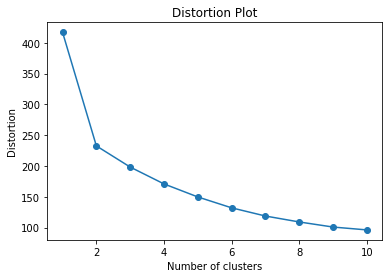

In [73]:
# Demographics distortion plot
plot_distortion(df_seg_full)

# **Main function**

In [61]:
def Nik(dataframe, ScalingMethod, ClusteringMethod, NumberOfClusters, epsilon=0.5, min_samples=5):   
    if ScalingMethod == 'MinMax':
        scaler = MinMaxScaler()
    elif ScalingMethod == 'Standard':
        scaler = StandardScaler()
    elif ScalingMethod == 'Robust':
        scaler = RobustScaler()
    elif ScalingMethod == 'MaxAbs':
        scaler = MaxAbsScaler()
    else:
        print('Error: no valid scaler specified')
        
    df_scaled = pd.DataFrame(scaler.fit_transform(dataframe.astype(float)), columns = dataframe.columns)
    
    if ClusteringMethod == 'KMeans':
        df_scaled['Cluster'] = KMeans(n_clusters=NumberOfClusters, n_init=10).fit_predict(df_scaled)
    elif ClusteringMethod == 'Agglomerative':
        ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters = NumberOfClusters)
        df_scaled['Cluster'] = ac.fit_predict(df_scaled)
    elif ClusteringMethod == 'DBSCAN':
        db = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
        df_scaled['Cluster'] = db.fit_predict(df_scaled)
    else:
        print('Error: no valid clustering method specified')
    
    df_radar = df_scaled.groupby('Cluster').mean().divide(df_scaled.drop('Cluster',axis=1).mean())*100
    
    return df_radar

In [78]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)
df_seg_full_transformed = vt.fit_transform(df_seg_full)

# columns we have selected
# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = df_seg_full.columns[vt.get_support()]

# transforming an array back to a data-frame preserves column labels
df_seg_full_transformed = pd.DataFrame(df_seg_full_transformed, columns = selected_columns)

In [79]:
# step 1
df_corr = df_seg_full_transformed.corr().abs()
df_corr

,income,age,years_with_bank,nbr_children,marital_status,gender_M
income,1.000000,0.244919,0.040604,0.283352,0.247422,0.147011
age,0.244919,1.000000,0.181478,0.057195,0.340570,0.008516
years_with_bank,0.040604,0.181478,1.000000,0.034814,0.010743,0.004427
nbr_children,0.283352,0.057195,0.034814,1.000000,0.476528,0.009320
marital_status,0.247422,0.340570,0.010743,0.476528,1.000000,0.000733
gender_M,0.147011,0.008516,0.004427,0.009320,0.000733,1.000000


In [92]:
df_seg_full2 = df_seg_full.copy()
df_seg_full2 = df_seg_full2.drop(['years_with_bank', 'gender_M '], axis=1)
df_seg_full2

,income,age,nbr_children,marital_status
0,26150,46,1,2
1,6605,71,0,2
2,18548,38,0,1
3,47668,54,0,1
4,44554,59,2,4
...,...,...,...,...
742,14795,36,1,4
743,26387,56,1,2
744,61300,50,2,2
745,15100,37,0,2


### Banking behavior clustering

In [50]:
df_cust_info3 = df_cust_info2.copy()
df_cust_info3.columns
df_cust_info3 = df_cust_info3.drop(columns=['cust_id', 'age', 'gender', 'nbr_children', 'marital_status'])
df_cust_info3.head(2)

,income,credit_balance,checking_balance,savings_balance,avg_tran_amt,count_tran_amt,avg_savings_tran_amt,avg_checking_tran_amt,avg_credit_tran_amt,cnt_savings_tran,cnt_checking_tran,cnt_credit_tran
0,50890,20.00,86.86,1187.97,76.971748,157.0,18.550769,-2.474646,60.895625,26.0,99.0,32.0
1,10053,369.72,95.32,2122.17,49.836424,187.0,58.474545,-25.435758,16.797636,33.0,99.0,55.0


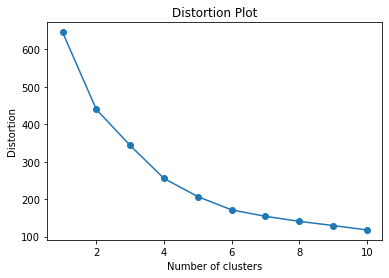

In [51]:
plot_distortion(df_cust_info3)

In [52]:
scaler = MinMaxScaler()
df_habits_scaled = pd.DataFrame(scaler.fit_transform(df_cust_info3.astype(float)))
df_habits_scaled['Cluster'] = KMeans(n_clusters=4, n_init=10).fit_predict(df_habits_scaled)
df_habits_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,Cluster
0,0.353018,0.002105,0.006588,0.052957,0.046217,0.596958,0.375927,0.717276,0.045422,0.419355,1.000000,0.206452,2
1,0.069736,0.038918,0.007229,0.094601,0.043202,0.711027,0.512149,0.621546,0.040569,0.532258,1.000000,0.354839,2
2,0.157398,0.115789,0.003450,0.000000,0.036306,0.650190,0.312631,0.720674,0.037557,0.000000,1.000000,0.464516,0
3,0.074232,0.000000,0.251206,0.005182,0.032739,0.190114,0.289669,0.570811,0.038720,0.403226,0.252525,0.000000,1
4,0.045818,0.162972,0.106269,0.000575,0.025651,0.391635,0.197907,0.617054,0.033440,0.306452,0.525253,0.206452,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,0.000000,0.000000,0.000000,0.102597,0.037982,0.045627,0.322366,0.727593,0.038720,0.193548,0.000000,0.000000,1
661,0.000000,0.000000,0.000000,0.000794,0.036507,0.068441,0.277064,0.727593,0.038720,0.290323,0.000000,0.000000,1
662,0.986938,0.723053,0.008050,0.049753,0.030188,0.581749,0.335024,0.675184,0.031977,0.403226,1.000000,0.187097,2
663,0.208578,0.000000,0.155770,0.024679,0.034398,0.448669,0.352575,0.556195,0.038720,0.306452,1.000000,0.000000,3


In [53]:
df_habits_scaled['Cluster'].value_counts()

2    211
1    189
3    149
0    116
Name: Cluster, dtype: int64

# Radar Chart

In [70]:
def plot_radar_chart(df, mean=False):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    # mean line
    if mean == True:
        data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                    theta= df.columns,
                                    name = 'mean',
                                    fill = 'toself'))
    
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [58]:
# Decent clusters:

# df_seg_full, 'MinMax', 'Agglomerative', 3

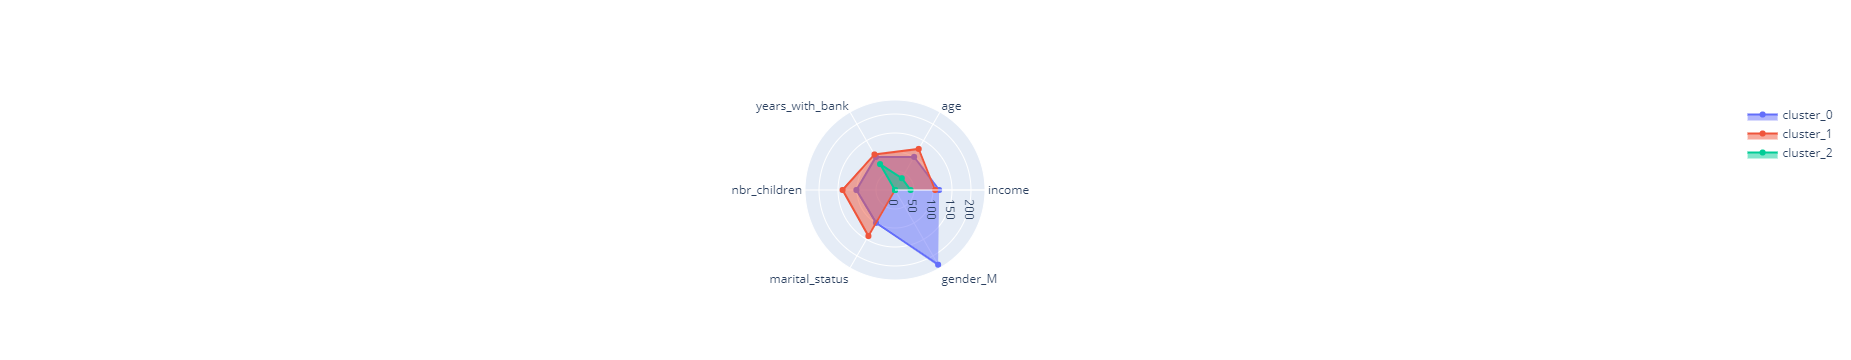

In [97]:
plot_radar_chart(Nik(df_seg_full, 'MinMax', 'Agglomerative', 3, epsilon=0.2, min_samples=10))

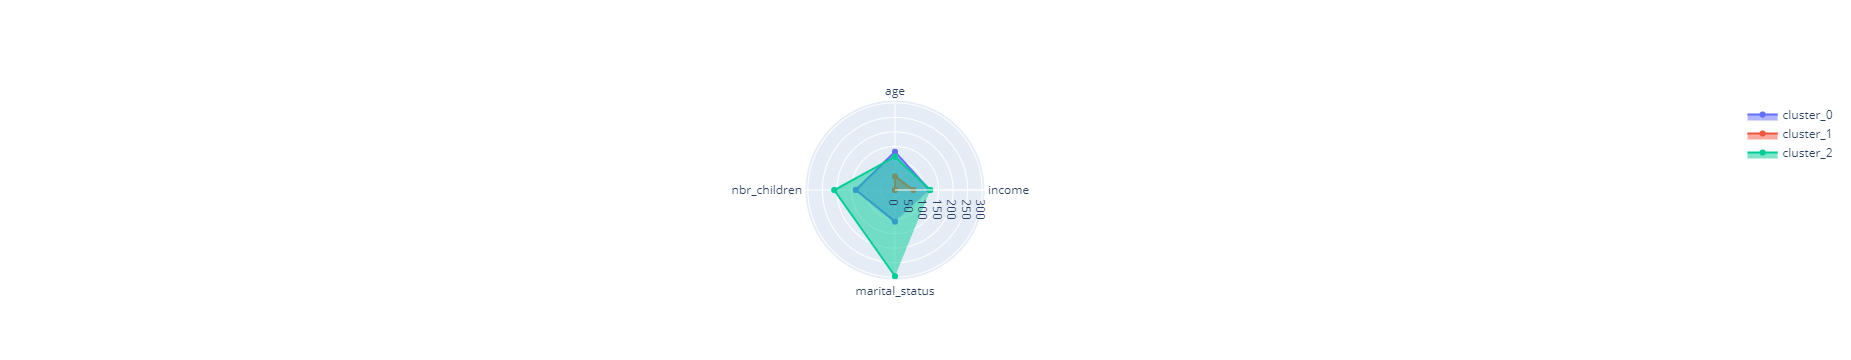

In [98]:
plot_radar_chart(Nik(df_seg_full2, 'MinMax', 'Agglomerative', 3, epsilon=0.2, min_samples=10))

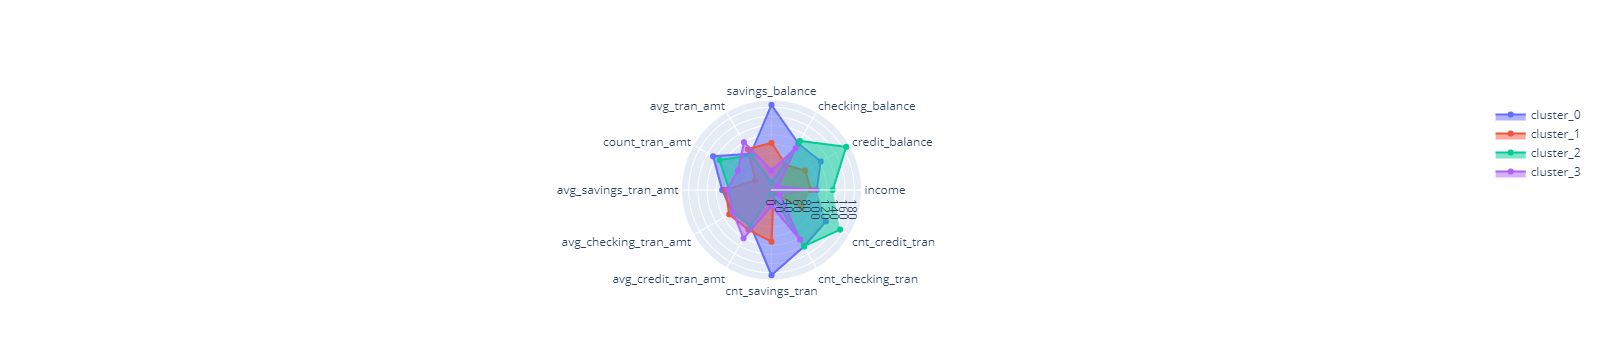

In [72]:
plot_radar_chart(Nik(df_cust_info3, 'MinMax', 'KMeans', 4, epsilon=0.2, min_samples=10))

# PCA --> Scatterplot Visualizations

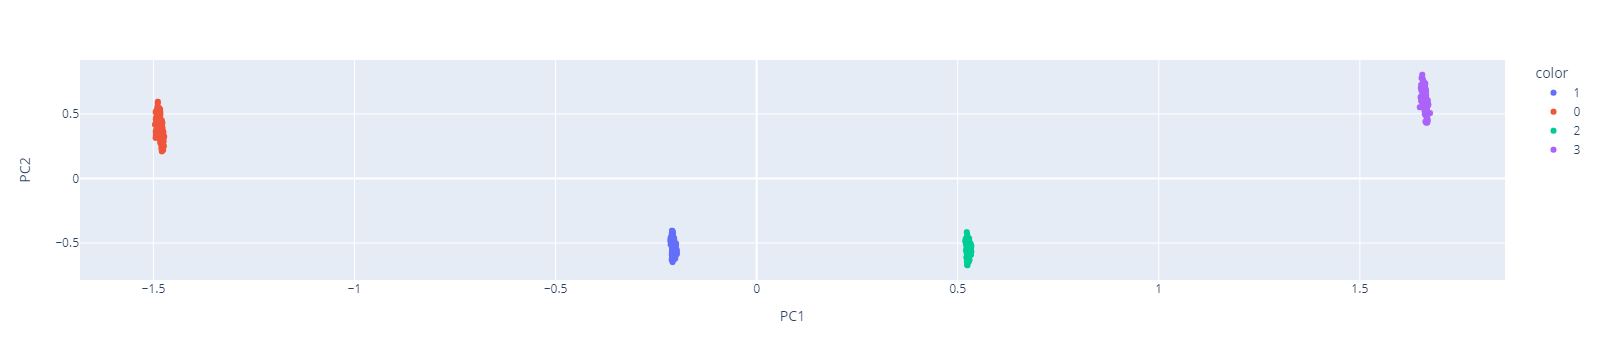

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

df_pca = pd.DataFrame(pca.fit_transform(df_seg_scaled), columns = ['PC1', 'PC2'])
df_pca['Cluster'] = df_seg_scaled['Cluster']

fig = px.scatter(df_pca, x='PC1', y='PC2', color=df_pca['Cluster'].astype(str))
fig.show()

In [77]:
df_pca

,PC1,PC2,Cluster
0,-0.208383,-0.527208,1
1,-0.206010,-0.547244,1
2,-1.482570,0.314259,0
3,-1.475157,0.292211,0
4,-1.486063,0.395111,0
...,...,...,...
742,-1.489986,0.513515,0
743,-0.208053,-0.563914,1
744,-0.200440,-0.534905,1
745,0.520760,-0.505628,2
